Data Science Project on Time Series with python using a Dataset- Fremont Bridge Bicycle Counts.

Inspired by **Cleverprogrammer**

In [27]:
import pandas as pd
bicycles = pd.read_csv('/content/fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv',index_col='Date', parse_dates=True)

In [28]:
#inspect the data
bicycles.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


To confirm data consistency run tail

In [29]:
bicycles.tail()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-06-30 19:00:00,39.0,31.0
2018-06-30 20:00:00,30.0,13.0
2018-06-30 21:00:00,21.0,13.0
2018-06-30 22:00:00,11.0,10.0
2018-06-30 23:00:00,12.0,14.0


In [30]:
bicycles.shape

(50328, 2)

We will need to add a column that has both the Fremont Bridge East Sidewalk and Fremont Bridge West Sidewalk

In [31]:
#But first we need to change the column names
bicycles.columns

Index(['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], dtype='object')

In [32]:
#Change the column names
bicycles = bicycles.rename(columns={"Fremont Bridge East Sidewalk": "East", "Fremont Bridge West Sidewalk": "West"})

In [33]:
#confirm the columns are changed
bicycles.columns

Index(['East', 'West'], dtype='object')

In [34]:
#use eval to create a new column
bicycles['Total'] = bicycles.eval('East + West')

We need to run describe to get the summary of all the numerical columns

In [35]:
bicycles.describe(datetime_is_numeric=False)

,East,West,Total
count,50319.000000,50319.000000,50319.000000
mean,56.934399,52.940678,109.875077
std,82.835585,68.728939,138.526584
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,717.000000,698.000000,957.000000


The above shows that  the Easst data has a slightly higher mean and a higher Stndard Deviation. 

A higher Standard Deviation means All th values for East could be more spread. Having higher means and Deviation could result to Outliers.. However, this is yet to be proved. 

In [36]:
#to get more info about the dataframe
bicycles.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50328 entries, 2012-10-03 00:00:00 to 2018-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   East    50319 non-null  float64
 1   West    50319 non-null  float64
 2   Total   50319 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


Visualize

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Lets get a visual representation of how the values are distributed

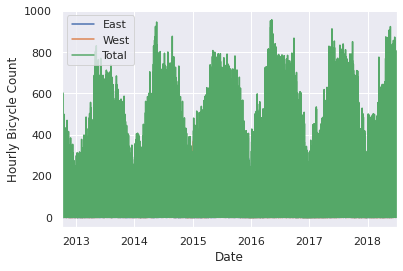

In [39]:
bicycles.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of. We can gain more insight by resampling the data to a coarser grid. Let’s resample by week.

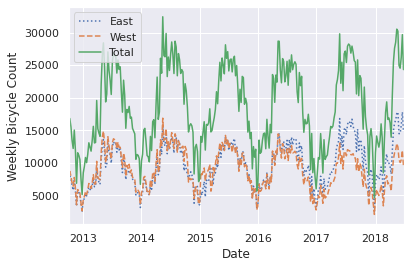

In [41]:
weekly = bicycles.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Bicycle Count');

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window

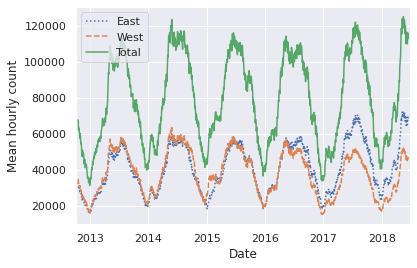

In [42]:
bicycles = bicycles.resample('D').sum()
bicycles.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('Mean hourly count');

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.

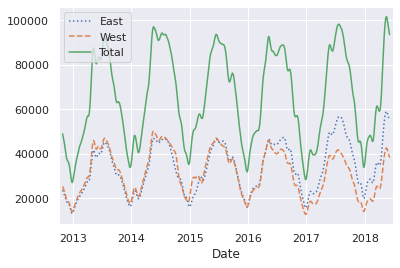

In [43]:
bicycles.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

# **Digging into the data**
While the smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality:

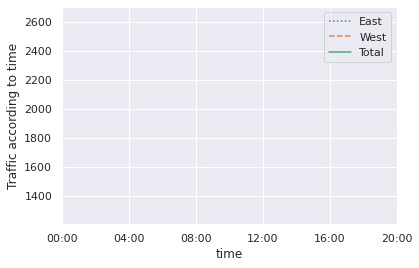

In [46]:
import numpy as np
by_time = bicycles.groupby(bicycles.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()